In [64]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from PIL import Image
import numpy as gfg 

## Proceado de imaganes por telescopios de Alma

En este proyecto se describe el proceso de como crear un Beam, es decir, una simulación de como un conjunto de telescopios recopilan datos del cielo, cada par de telecopios cream un Beam y por si decirlo, cream un pixel en el filtro final de alguna imagen, a este proceso se llama inteferometría y tiene la propiedad de sustituir la construcción de grandes telescopios con grandes y costosos lente, con pequeños y moviles telescopios, que ubicados de manera correcta remplasan el aparatoso hecho de contruir un gran lente con un gran telescopio. 

In [2]:
Pos = np.loadtxt("vlaa.txt") #se extrae los datos, usualmente trabajo con numpy, peor perfectamente se puede reemplazar por 
                             # por series o dataframes de la libreria Pandas. 

In [3]:
# condiciones iniciales
# Propiedaades fisicas de los telecopios muy bien conocidas y compartidas por ALMA.

L = (np.pi/180)*(34.0790) #declinación del lugar de observación
time_steps = 600

DisM = np.zeros([27,27])
AM = np.zeros([27,27]) 
EM = np.zeros([27,27]) 
h = np.linspace(-4,4,time_steps)*np.pi/12 #franja ahoraria captada
decli = 34*np.pi/180

c = 3.0e5 # m/s velocidad de disperción de la Luz en el vacio (Caso para simplicar el problema)
f = 1.420e8 # hz se trabaaja en ondas de radio principalmente

In [4]:
# se crean las matrices con Distancia entre los telescipios y angulo entre Cada Baseline

for i in range(27):
        
    for j in range(27):
        
        if j != i :
            
            b_ENU = Pos[i] - Pos[j]
            DisM[i,j] = np.sqrt(np.sum((b_ENU)**2))
            AM[i,j] = np.arctan2(b_ENU[0],b_ENU[1])

In [5]:
# función de transformaicón de coordendas

def fMatrix(H,E,A,dis,decli):
    xyz = np.array([np.cos(L)*np.sin(E) - np.sin(L)*np.cos(E)*np.cos(A),np.cos(E)*np.sin(A),np.sin(L)*np.sin(E) + np.cos(L)*np.cos(E)*np.cos(A)])
    VXYZ = dis*xyz
    
    Mtrans = -(f/c)*np.array([[np.sin(H),np.cos(H),0],[-np.sin(decli)*np.cos(H),np.sin(decli)*np.sin(H),np.cos(decli)],[np.cos(decli)*np.cos(H),-np.cos(decli)*np.sin(H),np.sin(decli)]])
    
    uvw = np.dot(Mtrans,VXYZ)
    
    return uvw

In [6]:
MFBase = np.zeros([27*27,600,3]) # arreglo de matrices, cada matriz tiene la información de cada baseline 

In [7]:
# consisten en que cada sup matriz tiene la información de todo el trayecto de cada baseline por tanto son 27*27 baseline,
# y cada base line con 8h de recorrido 
for i in range(27):
    for j in range(27):
        for k in range(600):
            
            s = j + i*27 
            MFBase[s,k,:] = fMatrix(h[k],EM[i,j],AM[i,j],DisM[i,j],decli)

In [8]:
a = np.zeros([2,4,3])

In [9]:
a[1,1,:] = [1,2,3]

In [10]:
base12x = MFBase[1,:,0]/10000
base12y = MFBase[1,:,1]/10000
base12z = MFBase[1,:,2]/10000
base21x = MFBase[27,:,0]/10000
base21y = MFBase[27,:,1]/10000
base21z = MFBase[27,:,2]/10000

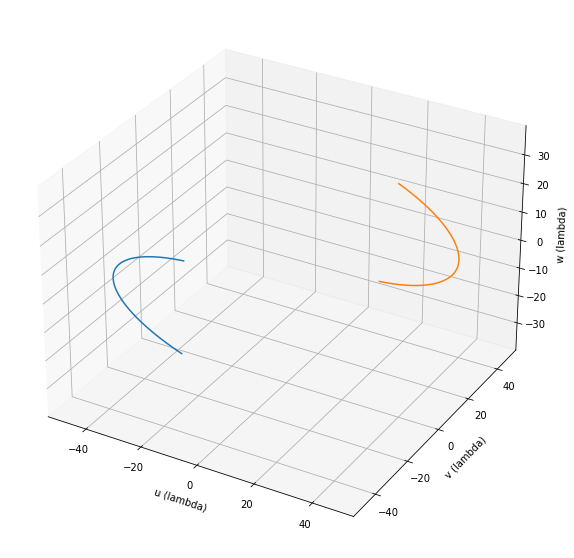

In [11]:
# se toma las Baselines 1-2 y 2-1, mostando evidentemente que si depende de que lado mire la baseline , son trayectorias opuestas
# no es lo mismo la baseline 1-2 que la 2-1 aunque tenga la misma distancia entre ello
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(base12x, base12y, base12z)
ax.plot(base21x, base21y, base21z)
ax.set_xlabel('u (lambda)')
ax.set_ylabel('v (lambda)')
ax.set_zlabel('w (lambda)')
plt.show()

In [12]:
MFBase1 = np.zeros([27*27,600,3])
decli1 = 10*np.pi/180
MFBase2 = np.zeros([27*27,600,3])
decli2 = 90*np.pi/180

In [13]:
# se quiere poner en evidencia la diferencia entre mirarlo por ejemplo en Chile, Argentina o Noruega. Es claro que lo efectos
# cambian según el sitio.
# Transformaciones para las demas declinaciones 90° y 10°
# un poco crudo el calculo es necesario optimizar y buscar un mejor metodo para calcular las diferentes declinaciones

for i in range(27):
    for j in range(27):
        for k in range(600):
            
            s = j + i*27 
            MFBase1[s,k,:] = fMatrix(h[k],EM[i,j],AM[i,j],DisM[i,j],decli1)
            
for i in range(27):
    for j in range(27):
        for k in range(600):
            
            s = j + i*27 
            MFBase2[s,k,:] = fMatrix(h[k],EM[i,j],AM[i,j],DisM[i,j],decli2)

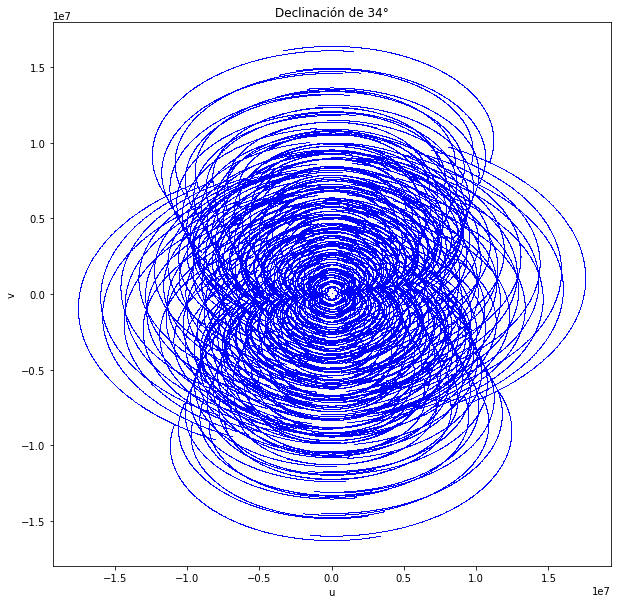

In [14]:
plt.figure(figsize = (10,10))
for i in range(27*27):
    
    plt.plot(MFBase[i,:,0],MFBase[i,:,1], ",b")
    
plt.xlabel("u")
plt.ylabel("v")
plt.title("Declinación de 34°")
plt.show()

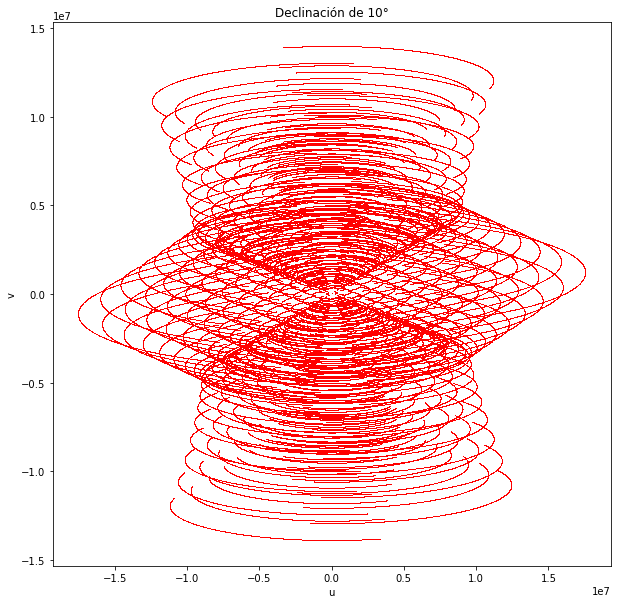

In [15]:
plt.figure(figsize = (10,10))
for i in range(27*27):
    
    plt.plot(MFBase1[i,:,0],MFBase1[i,:,1], ",r")
    
plt.xlabel("u")
plt.ylabel("v")
plt.title("Declinación de 10°")
plt.show()

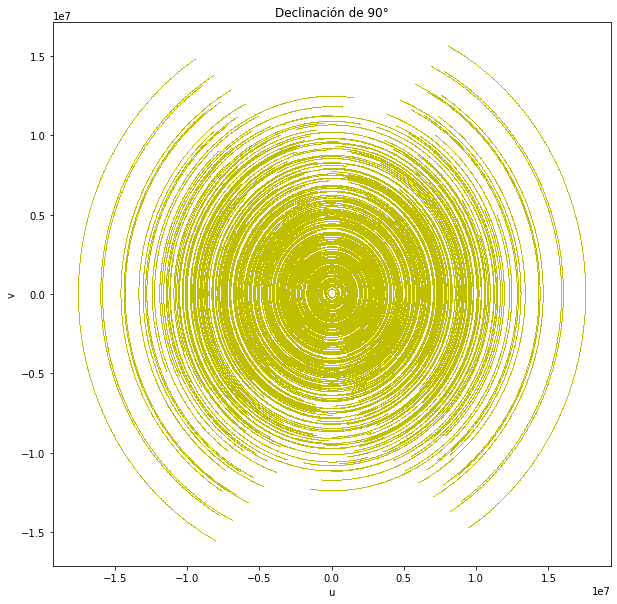

In [16]:
plt.figure(figsize = (10,10))
for i in range(27*27):
    
    plt.plot(MFBase2[i,:,0],MFBase2[i,:,1], ",y")
    
plt.xlabel("u")
plt.ylabel("v")
plt.title("Declinación de 90°")
plt.show()

In [17]:
# es evidente que la declinción influye mucho y que se obtine lo esperado en 90° ya que a esta declinación la trayectorias 
# de los objetos en el globo terraqueo son circulos prefectos 

MFBaseEs = MFBase*500/np.max(MFBase) #transformación de ejes por un factor simple 


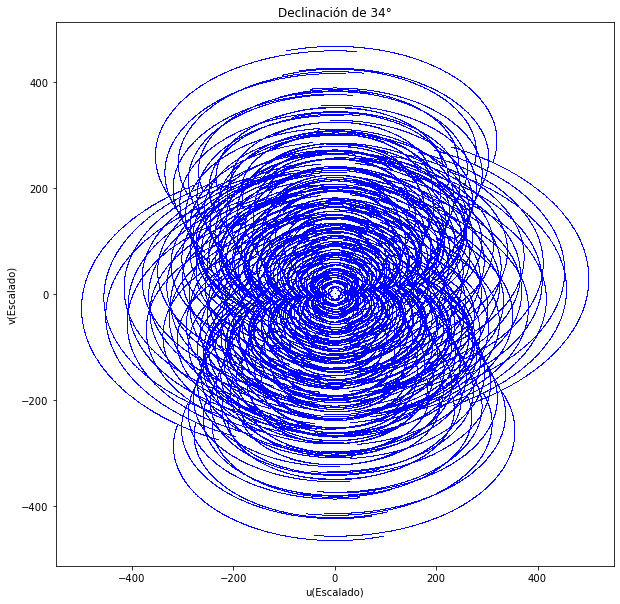

In [18]:
plt.figure(figsize = (10,10))
for i in range(27*27):
    
    plt.plot(MFBaseEs[i,:,0],MFBaseEs[i,:,1], ",b")
    
plt.xlabel("u(Escalado)")
plt.ylabel("v(Escalado)")
plt.title("Declinación de 34°")
plt.show()

In [19]:
ImagenEs = np.zeros([1000,1000])

u = np.arange(-500,500,1)
v = np.arange(-500,500,1)

In [23]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [30]:
IMFBase = MFBaseEs.astype(int) # gracias a este paso cada posición ordena de manera auntomatica la matriz imagen y de una vez se 
# hace un shift gracias a los numero negativos

In [33]:
# Creando el Beam, donde exista un pixel por la interferencia de dos telecopios, se agrega un pixel a una imagen creada de 0,
# que como resultado devuelve una imagen 1000x1000 que sirve como filtro a culaquier imagen.

for i in range(27*27):
    for j in range(600):
        if ImagenEs[IMFBase[i,j,0],IMFBase[i,j,1]] == 0:
            ImagenEs[IMFBase[i,j,0],IMFBase[i,j,1]] = 1

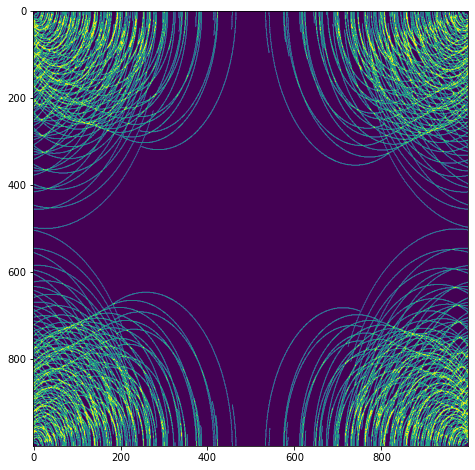

In [40]:
plt.figure(figsize = (8,8))
plt.imshow(ImagenEs)
plt.show() 
# se aprecia la imagen 

In [80]:
TImangen = np.fft.ifft2(ImagenEs)
MagImagen = np.abs(TImangen)
shiMagIm = np.fft.fftshift(MagImagen)
lgMagImagen = np.log(shiMagIm)

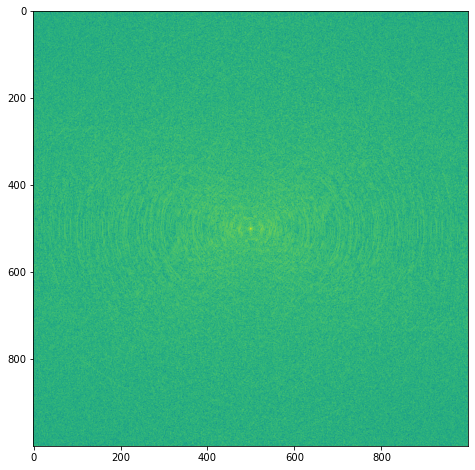

In [81]:
plt.figure(figsize = (8,8))
plt.imshow(lgMagImagen)
plt.show()

# transformada inversa de furier y se nota el beam de un objeto puntual en el cielo
# se logra la simulación del beam de manera satifactoria

In [72]:
img = Image.open('Eltravis1000x1000.jpg') 
  
imageToMatrice = gfg.asarray(img) 
  
Imtm1 = imageToMatrice[:,:,1]

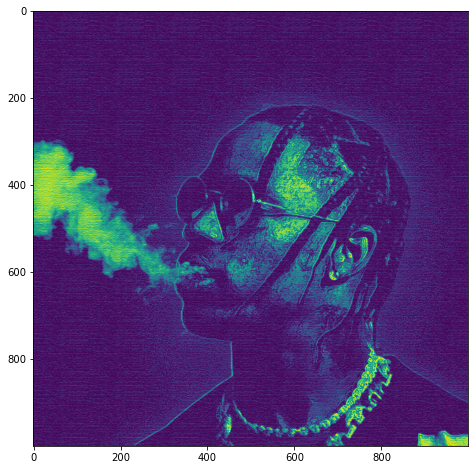

In [73]:
# se esocogio al una imagen del artista de trap Travis Scott en verde
plt.figure(figsize = (8,8))
plt.imshow(Imtm1)
plt.show()

In [100]:
tftravis = np.fft.fft2(Imtm1)
abstftravis = abs(tftravis)
logtravis = np.log(abstftravis)

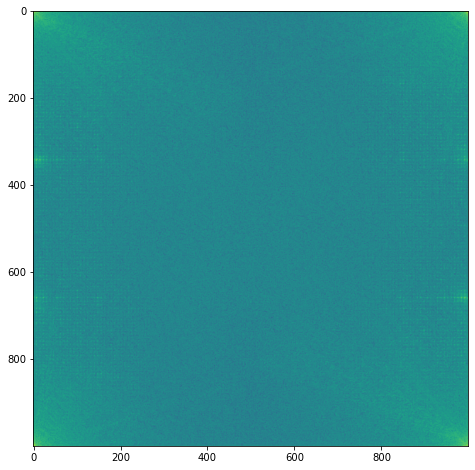

In [105]:
plt.figure(figsize = (8,8))
plt.imshow(logtravis)
plt.show()
# trasformada inversa de fourier, notamos un patron similar al obtenido por los arreglos de las baseline

In [106]:
filtravis = tftravis*ImagenEs

BackTravis = np.fft.ifft2(filtravis)
Abstravis = abs(BackTravis)

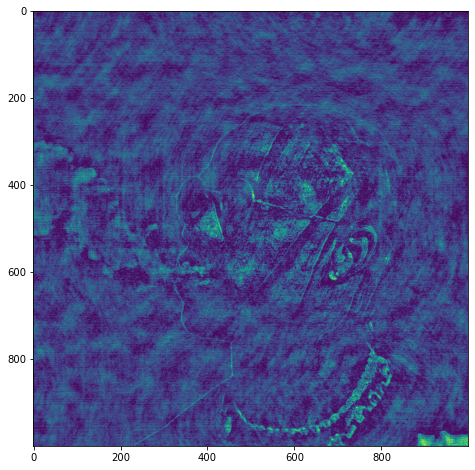

In [110]:
plt.figure(figsize =(8,8))
plt.imshow(Abstravis)
plt.show()

# aplicando el flitro y se denota la aliminción de ondas largas como el escenario, el fondo, el humo y la piel y se conserva las
# ondas cortas como el collar, el marco de las gafas, las cadena, y joyas y ciertos detalles de la camisa 